AIM:
-
         
         
         The aim of this file (netflix.csv) is to store, organize, and analyze relevant information in a structured format, allowing for meaningful insights through data processing, statistical analysis, and visualization.


### OBJECTIVE:

To explore the Netflix dataset.

To compare Movies and TV Shows.

To analyze content release trends by year and month.

To identify the most common genres.

To study the distribution of content ratings.

IMPORTED LIBRARY AND THEIR USES:
-

    * Pandas - It is denoted as pd , which is used for data manipulation and analysis.
    * numpy  - It is denoted ad np , which is the core library for numerical computations in Python.
    * matplotlib.pyplot - It is denotd as plt , which is a fundamental library for data visualization.
    * seaborn - It is debnotd as sns, which is built on top of matplotlib and specializes in statistical data visualization.
    * warnings - filterwarning("ignore"),The warnings module manages warning messages.

In [3]:
# Netflix Data Cleaning
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

The file has been read and identified the total number of rows and columns bore starting the data cleaning 

In [4]:
# Load the dataset
df = pd.read_csv("netflix1.csv")

In [5]:
# Display the updated DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


DATA CLEANING:
-
            Data cleaning is the process of preparing raw data for analysis by correcting or removing inaccurate, incomplete, or irrelevant parts. By using 
            * isnull() - detect NAN values in dataframe. 
            *dropna()  - remover rows or columns with missing values. 
            *fillna()  - replacing missing values with a specified values or method.
            *dropduplicate() - remove duplicate rows .
            *info() - displays a concise summary: names,non-null counts, and data types.
            *describe() - provides statistical summary for numerical columns: count,mean,std,min,max,etc...
            *unique - returns unique values in a series 
            *shape - returns a tuple of (rows & columns) in the dataframe 
            *head() - shows the 1st half or upper rows and columns in the dataset 
            *tail() -  shows the last half or lower part in the dataset 

In [6]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [7]:
# Capitalize all column names
df.columns = df.columns.str.capitalize()

In [8]:
df.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
# 3. Quick Overview
print(f'Shape of Dataset {df.shape}')
print('\n')
print(f'Info of Dataset {df.info()}')

Shape of Dataset (8790, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8790 non-null   object
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date_added    8790 non-null   object
 6   Release_year  8790 non-null   int64 
 7   Rating        8790 non-null   object
 8   Duration      8790 non-null   object
 9   Listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
Info of Dataset None


In [10]:
df.isnull().sum()

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Rating          0
Duration        0
Listed_in       0
dtype: int64

In [11]:
df.shape

(8790, 10)

In [12]:
print(df.dtypes)

Show_id         object
Type            object
Title           object
Director        object
Country         object
Date_added      object
Release_year     int64
Rating          object
Duration        object
Listed_in       object
dtype: object


In [13]:
# Convert 'date_added' to datetime format
df['Date_added'] = pd.to_datetime(df['Date_added'], errors='coerce')

In [14]:
# Extract year and month from date_added for analysis later
df["Year"] = df["Date_added"].dt.year
df["Month"] = df["Date_added"].dt.month
df['Date']=df['Date_added'].dt.day

In [15]:
df.shape

(8790, 13)

In [16]:
# Step 4: Remove duplicates if any
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(8790, 13)

In [18]:
df.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in,Year,Month,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


### DATA VISUALIZATION

1.Matplotlib and seaborn are two popular python libraries for data visualization.

2.Matplotlib commonly used for simple line plots, bar charts, histograms, etc.

3.Seaborn statistical plots, built on top of matplotlib





BOXPLOT:
-
        
        A boxplot is a graphical representation of the distribution of dataset. It is useful for spotting outlier, uderstanding spread, and comparing medians across differnt groups 

The below code helps to combain all the columns for plotting boxplot
-

In [19]:
num_column=df.select_dtypes(include=['number'])
len(num_column.columns)

4

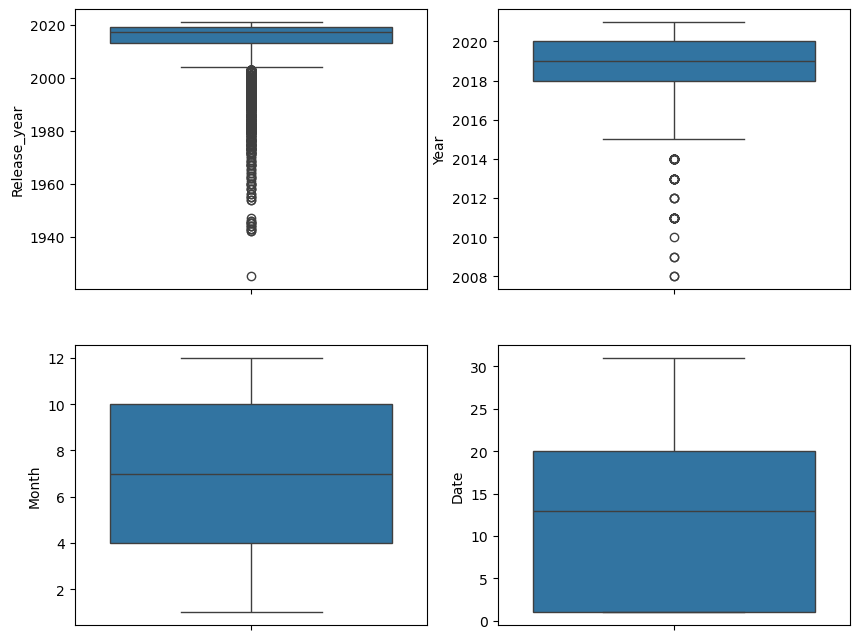

In [20]:
plt.figure(figsize=(10,8))
for i in range(len(num_column.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=num_column.columns[i],data=df)
plt.show()

-----
-----

1.UNIVARIENT ANALYSE
-

Univariate analysis examines a single variable to understand its distribution, central tendency, and spread

**1.COUNTPLOT FOR TYPE COLUMN**

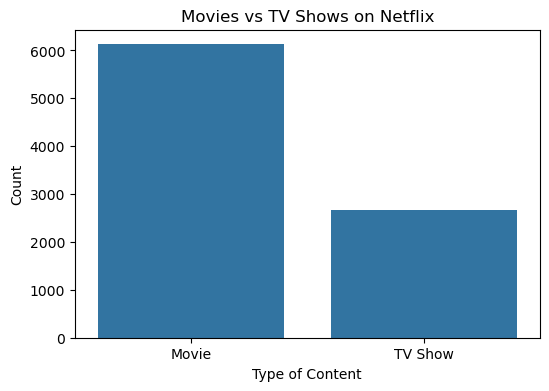

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Type")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

- Movies dominate Netflix’s library → The number of movies is more than double the number of TV shows.

- TV Shows are fewer but growing → While movies still lead, Netflix has been increasing its investment in original TV shows in recent years.

- User preference reflection → This imbalance may reflect Netflix’s strategy to offer a wide variety of films to attract global audiences.

- TV Shows are strategic for engagement → Though smaller in number, TV shows often keep users subscribed longer because of multiple episodes/seasons.

- Overall insight → Netflix is primarily a movie-heavy platform, but TV shows play a crucial role in retaining subscribers and driving long-term engagement.

**2.COUNTPLOT FOR RATING**

TV-MA (Mature Audience) is the most common rating with over 3,000 titles, meaning Netflix has a strong focus on adult-oriented content.

TV-14 comes second, showing a large share of content suitable for teenagers and young adults.

TV-PG and R-rated titles form the next tier, catering to family audiences and mature movie watchers.

Ratings like TV-Y, TV-Y7, PG, and TV-G are much fewer, indicating limited children’s content compared to adult and teen content.

Rare ratings such as NC-17, UR, and G are almost negligible, suggesting Netflix avoids extremely restricted or overly niche categories.

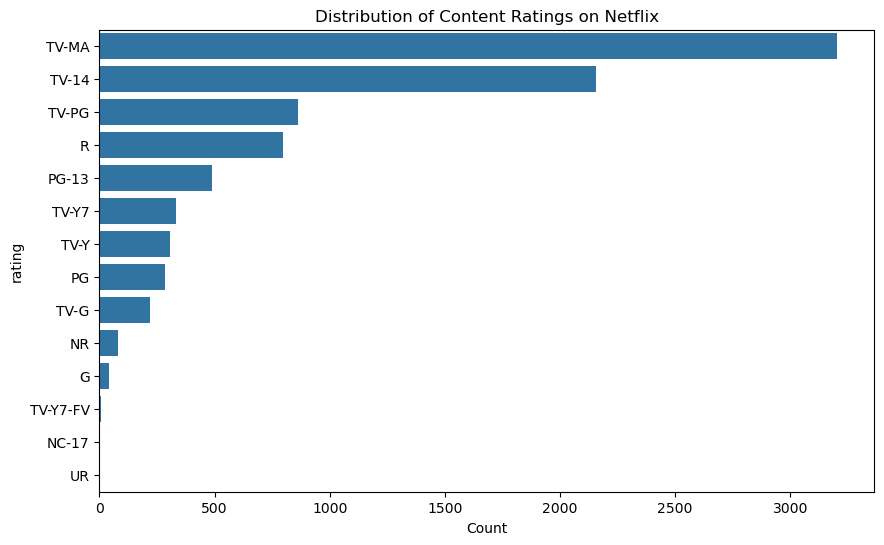

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Rating", order=df["Rating"].value_counts().index, )
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("rating")
plt.show()


TV-MA (Mature Audience) is the most common rating with over 3,000 titles, meaning Netflix has a strong focus on adult-oriented content.
TV-14 comes second, showing a large share of content suitable for teenagers and young adults.
TV-PG and R-rated titles form the next tier, catering to family audiences and mature movie watchers.
Ratings like TV-Y, TV-Y7, PG, and TV-G are much fewer, indicating limited children’s content compared to adult and teen content.
Rare ratings such as NC-17, UR, and G are almost negligible, suggesting Netflix avoids extremely restricted or overly niche categories.


**3.DENSITY PLOT FOR RELEASE YEAR**



Very few titles before 1980 – Netflix’s library includes only a handful of very old/classic movies.

Gradual rise after 1990s – Content availability slowly increases from the 1990s onward.

Sharp growth after 2000 – The density starts climbing rapidly after 2000, reflecting the digital and streaming boom.

Peak around 2015–2020 – Most Netflix titles are concentrated in this period, showing the platform’s aggressive expansion.

Slight decline post-2020 – The density drops after 2020, possibly due to the COVID-19 pandemic affecting production.



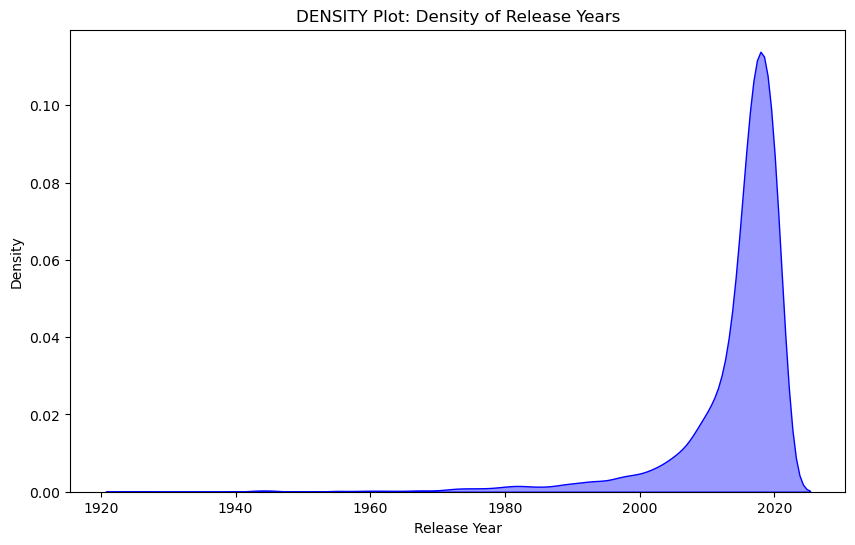

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Release_year", fill=True, color="blue", alpha=0.4)
plt.title("DENSITY Plot: Density of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Density")
plt.show()

Very few titles before 1980 – Netflix’s library includes only a handful of very old/classic movies.
Gradual rise after 1990s – Content availability slowly increases from the 1990s onward.
Sharp growth after 2000 – The density starts climbing rapidly after 2000, reflecting the digital and streaming boom.
Peak around 2015–2020 – Most Netflix titles are concentrated in this period, showing the platform’s aggressive expansion.
Slight decline post-2020 – The density drops after 2020, possibly due to the COVID-19 pandemic affecting production.


2.BIVARIATE ANALYSE
-

**1.BARPLOT FOR TOP COUNTEIES**

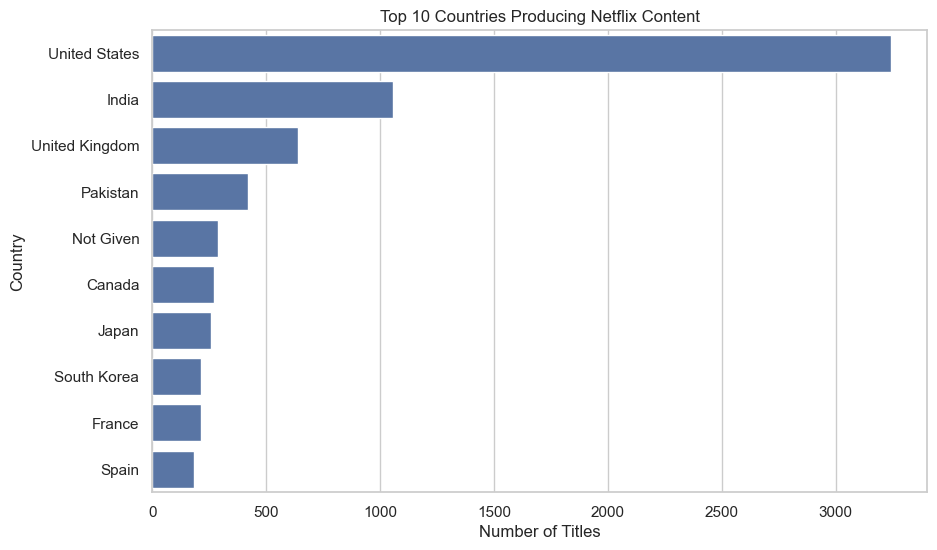

In [150]:
plt.figure(figsize=(10,6))
top_countries = df["Country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

United States dominates with the highest number of Netflix titles (by a big margin).
India is in second place, showing its strong role in Netflix’s international expansion.
United Kingdom follows, contributing a significant number of titles.
Countries like Pakistan, Canada, Japan, South Korea, France, and Spain also appear, but with much smaller contributions compared to the US.
The presence of “Not Given” indicates missing country data in the dataset.


**2.BARPLOT FOR GENDER COUNTS**

C:\Users\anjanacs\AppData\Local\Temp\ipykernel_29648\3438338837.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")


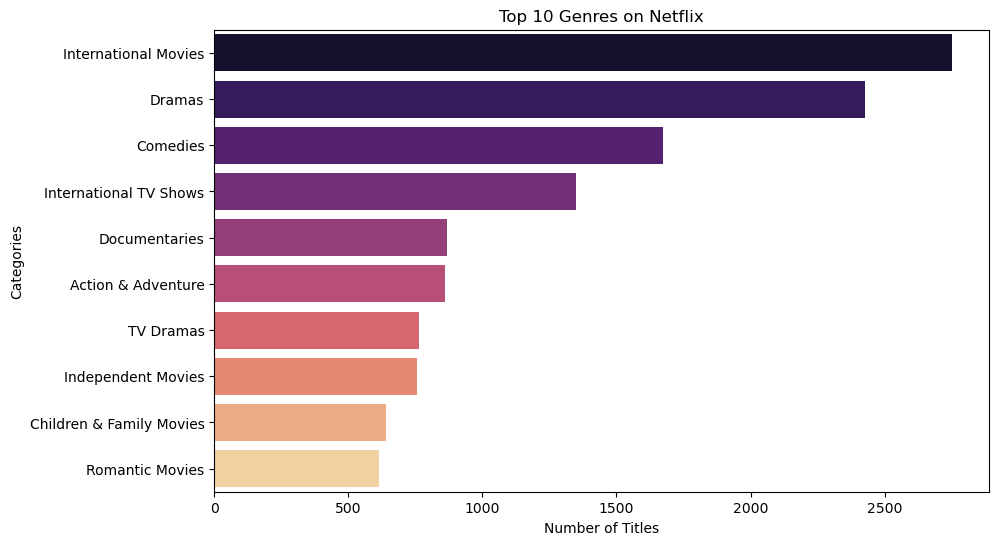

In [26]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract genres
genres = []
for entry in df["Listed_in"].dropna():  # Corrected column name
    for g in entry.split(", "):
        genres.append(g)

# Count and sort top genres
genre_counts = pd.Series(Counter(genres)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Categories")
plt.show()

International Movies dominate, showing Netflix’s strong focus on global/local content to appeal to different regions.
Dramas and Comedies are next — these are evergreen genres with wide appeal.
International TV Shows also rank high, reinforcing Netflix’s strategy of diversifying content beyond Hollywood.
Documentaries have a strong presence, reflecting growing interest in real-life stories.
Genres like Action & Adventure, TV Dramas, Independent Movies, Children & Family Movies, and Romantic Movies are present but comparatively smaller.


**3.HISTPLOT FOR CONTENT ADDED TO NETFLIX PER YEAR

In [27]:
# Netflix Data Visualization
# Optional: if your file is raw, make sure to clean first
# (date_added, year/month, duration_int, etc.)
# Assuming you already have the cleaned version with these columns.

# Set seaborn style for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

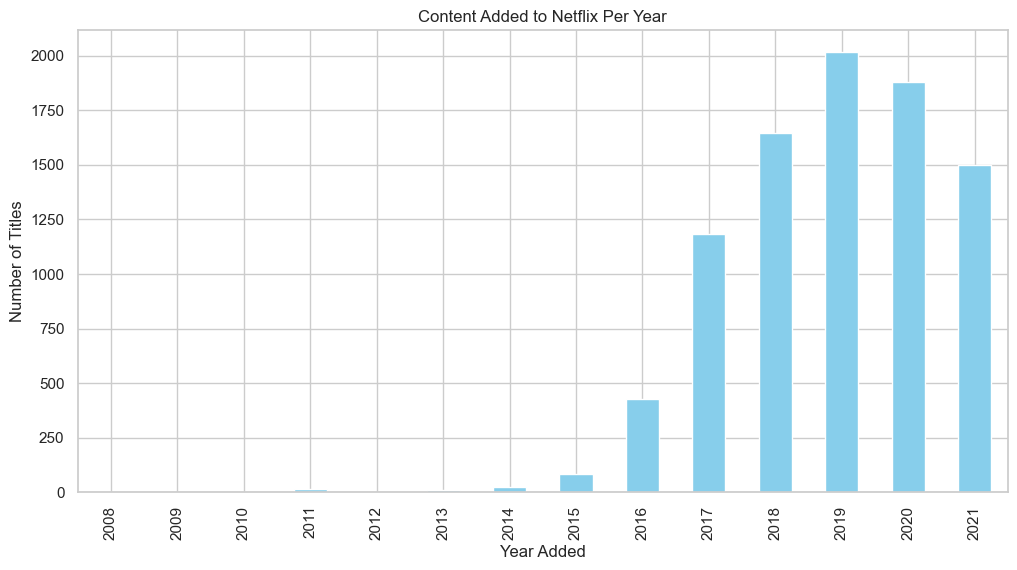

In [29]:
# 2. Content Added Per Year

plt.figure(figsize=(12,6))
df["Year"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Content Added to Netflix Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


Sharp Growth After 2015
Netflix added very little content before 2014.
From 2015 onwards, there’s a sharp rise, reflecting Netflix’s global expansion.
Peak Years
Around 2017–2019, the number of new titles surged, peaking close to 2000 titles per year.
This was the period when Netflix heavily invested in original content and international licensing.
Slight Decline After 2020
After 2019, the trend shows a slight decline in content addition.
Possible reasons:
Market saturation.
COVID-19 pandemic affecting production.
Netflix focusing on quality originals rather than bulk additions.


3.MULTIVARIANT ANALYIZE
-

**1.Heatmap for Release Year and Duration Min**

HEATMAP:
-
    ->A heatmap is a data visualization technique that uses color gradients to represent values in a matrix (rows × columns).
    ->In this we used correlation heatmap. 

Strong Negative Correlation (−0.64) between Year and Month
Suggests that as the dataset spans across years, the monthly distribution of added titles changes.
Likely reflects Netflix’s uneven release strategy (not all months are equally active).
Moderate Negative Correlation (−0.45) between Release Year and Month
Older releases may have been added in bulk during specific months.
Recent releases follow a more regular pattern.
Low Correlation with Date
The exact day (date) of addition doesn’t show strong relationships with year or month.
This means Netflix releases content on various days without a fixed trend.
Release Year vs Year (−0.091)
Very weak relationship, showing that the year of release is not tightly linked to the year content was added to Netflix.
Example: Old movies/shows being added much later.


In [91]:
numeric_df=df.select_dtypes(include="number")
corr_matrix=numeric_df.corr()

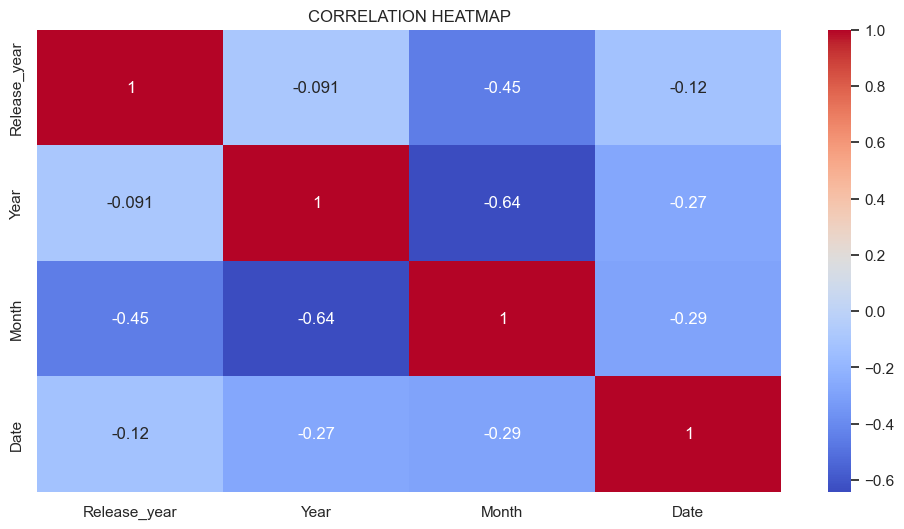

In [92]:
# CORRELATION HEATMAP
sns.heatmap(corr_matrix.corr(), annot=True , cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()

PAIR PLOT:
-

 A pair plot (also called a scatterplot matrix) is a visualization that shows the pairwise relationships between multiple variables in a dataset.

Release Year vs Year
Shows that Netflix adds both new and old titles.
Many older movies/shows (from 1950s–2000s) were added in recent years, not just when they were released.
Month vs Year
Certain months have more additions, pointing to seasonal trends (holiday periods, mid-year boosts).
Date distribution
Titles are spread across different dates with no strict pattern → Netflix doesn’t stick to a single release day.
Diagonal histograms
Release Year is skewed towards 2000 onwards → majority of Netflix content is modern.
Addition Year (Year) shows a sharp rise after 2015 → aligns with Netflix’s global expansion.


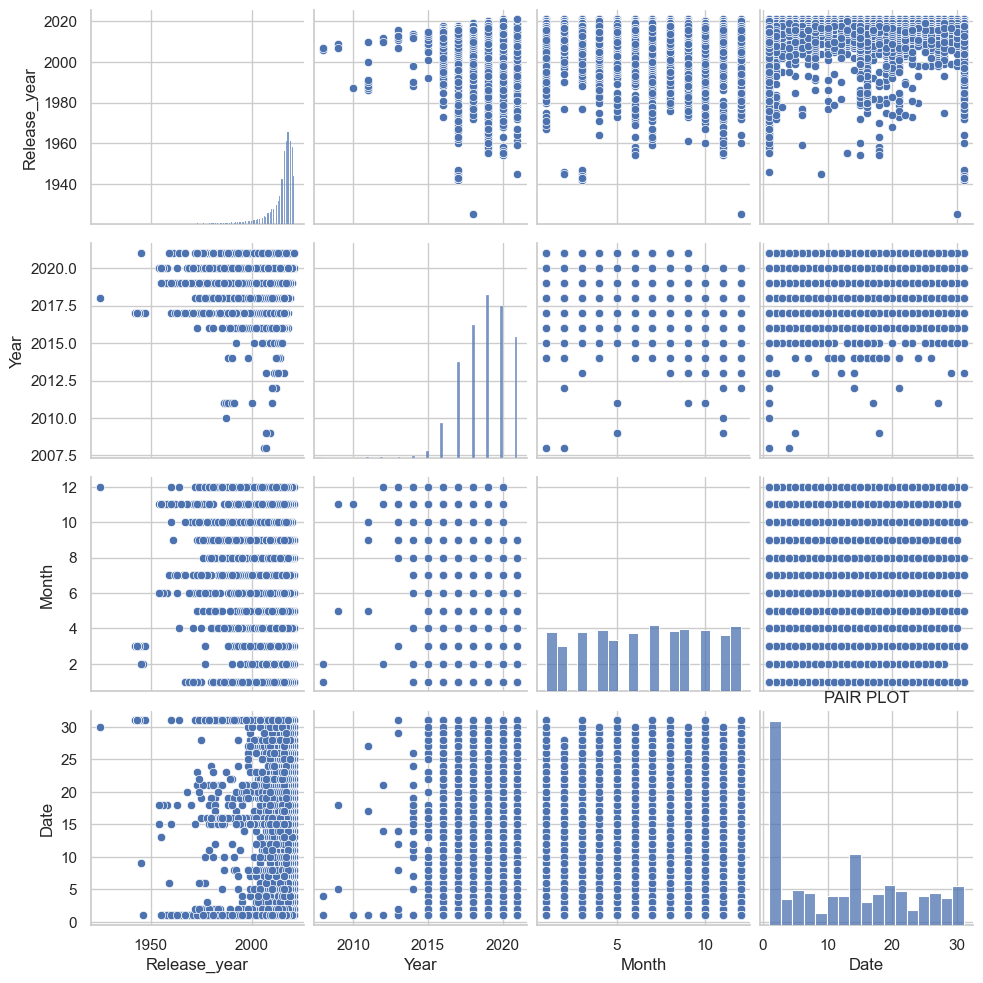

In [93]:
# PAIR PLOT
sns.pairplot(df)
plt.title("PAIR PLOT")
plt.show()

HYPOTHESIS TESTING

Perform two-sample t-test

"Is there a statistically significant difference between the average duration of Netflix Movies (in minutes) and TV Shows (in seasons)?

----

In [94]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv("netflix1.csv")

# Clean and extract numeric durations
# Keep only rows with 'min' in duration (i.e., Movies)
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)

# For TV Shows, convert '1 Season', '2 Seasons', etc. to numeric
df_tv = df[df['type'] == 'TV Show'].copy()
df_tv['duration_season'] = df_tv['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(df_movies['duration_min'], df_tv['duration_season'], equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("Significant difference in average duration between Movies and TV Shows.")
else:
    print("No significant difference in average duration between Movies and TV Shows.")


T-statistic: 269.805
P-value: 0.000
Significant difference in average duration between Movies and TV Shows.


Insights:
        Movies (minutes) and TV Shows (seasons) have significantly different average durations.

"Is the Average Duration of Netflix Movies Equal to 100 Minutes?"

In [95]:
import numpy as np
from scipy import stats

# Sample data: durations of 10 Netflix movies (in minutes)
durations = np.array([95, 102, 88, 110, 97, 105, 100, 92, 108, 99])

# Hypothesized population mean
pop_mean = 100

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(durations, pop_mean)

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean duration is significantly different from 100 minutes.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 100 minutes.")


T-statistic: -0.182
P-value: 0.860
Fail to reject the null hypothesis: No significant difference from 100 minutes.


Sample Data: The durations of 10 Netflix movies range between 92 and 110 minutes.

Null Hypothesis (H₀): The mean duration of Netflix movies is 100 minutes.

Alternative Hypothesis (H₁): The mean duration is not 100 minutes.

Test Results:

T-statistic = -0.182 → Very close to 0, meaning the sample mean is nearly the same as 100.

p-value = 0.860 → Much greater than 0.05.

import numpy as np
from scipy.stats import norm

# Sample data: durations of 10 Netflix movies
durations = np.array([95, 102, 88, 110, 97, 105, 100, 92, 108, 99])

# Known population parameters
pop_mean = 100
pop_std = 15

# Sample statistics
sample_mean = np.mean(durations)
sample_size = len(durations)

# Calculate z-score
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

# Calculate p-value (two-tailed)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean duration is significantly different from 100 minutes.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 100 minutes.")


International Movies (21.7%) and Dramas (19.1%) dominate the Netflix catalog → Netflix is heavily focused on global and story-driven content.
Comedies (13.2%) and International TV Shows (10.6%) also take a big share → reflecting the platform’s push for light entertainment and regional series.
Documentaries (6.8%) and Action & Adventure (6.8%) highlight Netflix’s effort to balance between fun content and knowledge-based/real stories.
Smaller shares go to TV Dramas (6.0%), Independent Movies (6.0%), Children & Family Movies (5.0%), and Romantic Movies (4.8%) → showing niche but important audiences.

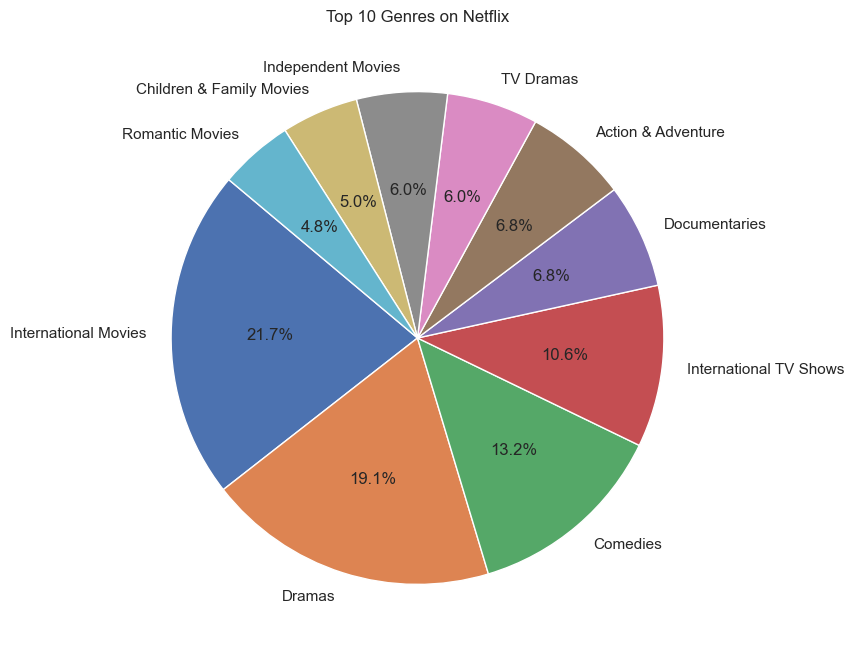

In [161]:
import matplotlib.pyplot as plt

# Split genres into multiple rows
genres = df['Listed_in'].dropna().str.split(', ')
genres = genres.explode()  # Flatten list to individual genres

# Count how many times each genre appears
genre_counts = genres.value_counts()

# Take only the top 10 genres
top_genres = genre_counts.head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Genres on Netflix")
plt.show()

Dominant Genres:

International Movies (21.7%) is the most common genre, making up more than 1/5 of the dataset.

Dramas (19.1%) is the second largest, showing that Netflix strongly features story-driven content.

Comedies (13.2%) also hold a significant share, confirming Netflix’s focus on entertainment variety.

Mid-Tier Genres:

International TV Shows (10.6%) show Netflix’s global expansion into television content.

Documentaries (6.8%) and Action & Adventure (6.8%) share equal importance, highlighting demand for both real-life storytelling and high-energy content.

Smaller Categories:

TV Dramas (6.0%), Independent Movies (6.0%), Children & Family Movies (5.0%), and Romantic Movies (4.8%) are less dominant but still contribute to diversity.